<img src="https://www3.um.edu.uy/logoum.jpg" width=300>
<h1 align="center">Thesis - ALS F1 </h1> 
<h2 align="center">Alejo Paullier</h2> 

In [1]:
from lenskit import batch, topn, util
from lenskit import crossfold as xf
from lenskit.algorithms import Recommender, als
from lenskit.algorithms.als import BiasedMF
import pandas as pd
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

ratings = pd.read_csv('D:\\Escritorio\\UM\\Tesis\\ML 1M\\ratings.dat', sep='::',engine='python',
                      names=['user', 'item', 'rating', 'timestamp'])

def eval(aname, algo, train, test):
    fittable = util.clone(algo) # Object cloning means to create an exact copy of the original object.
    fittable = Recommender.adapt(fittable) 
    fittable.fit(train) # Entrenamos el algoritmo con el training dataset
    users = test.user.unique() # Devuelve un array con los users unicos en el testing dataset
    # now we run the recommender
    recs = batch.recommend(fittable, users, 100)
    # add the algorithm name for analyzability
    recs['Algorithm'] = aname
    return recs

In [2]:
def model_trainer(features,reg):
    all_recs = []
    test_data = []
    features=int(features)
    als = BiasedMF(features=features, iterations=100, reg=reg, damping=5, bias=True,  progress=None) # define algorithm
     
    for train, test in xf.partition_users(ratings[['user', 'item', 'rating']], 5, xf.SampleFrac(0.2)):
        test_data.append(test) # save testing data
        all_recs.append(eval('ALS', als, train, test))
    
    all_recs = pd.concat(all_recs, ignore_index=True)
    test_data = pd.concat(test_data, ignore_index=True)
    rla1 = topn.RecListAnalysis()
    rla2 = topn.RecListAnalysis()
    rla1.add_metric(topn.precision)
    rla2.add_metric(topn.recall)
    prec = rla1.compute(all_recs, test_data)
    rec = rla2.compute(all_recs, test_data)
    F1 = ((prec['precision'].values*rec['recall'].values*2)/(prec['precision'].values+rec['recall'].values))
    F1 = np.nan_to_num(F1)
    return [F1.mean(),prec['precision'].mean(),rec['recall'].mean()]

In [3]:
from hyperopt import fmin, tpe, hp, STATUS_OK

def objective(params):
    features = params['features']
    reg = params['reg']
    metric = model_trainer(features,reg)
    print([features,reg,metric[0],metric[1],metric[2]],',')
    return {'loss': -metric[0], 'status': STATUS_OK }

space={'features': hp.uniform('features', 1, 100),
       'reg': hp.uniform('reg',0.01,0.4)}

best = fmin(objective, space, algo=tpe.suggest,max_evals=100)

[18.060963384548714, 0.3288997053400562, 0.05072223476206076, 0.0385082781456957, 0.14068772409605304]                 
,                                                                                                                      
[7.509348654653785, 0.27102440806753275, 0.0489711145470138, 0.03723178807947039, 0.1343250786016249]                  
,                                                                                                                      
[92.46079910182891, 0.04633948372083748, 0.05252148150898873, 0.039819536423841444, 0.14602204312259284]               
,                                                                                                                      
[54.975367647850476, 0.3912567778234834, 0.051905286771488666, 0.039352649006622935, 0.14464958195903596]              
,                                                                                                                      
[19.597759303353573, 0.10105212400139378

KeyboardInterrupt: 

In [4]:
array = [[9.061309967991361, 0.35382314220431993, 0.049233728533083394, 0.037478476821192375, 0.13485228382637426]              
,                                                                                                                      
[58.49676837282744, 0.23720311874043287, 0.052141175529637644, 0.03960761589404003, 0.14452588824342355]     #271.66/85          
,                                                                                                                      
[4.13179468056399, 0.09812782622104921, 0.04820976443334771, 0.036718543046357764, 0.130552588069612]        #386.95/17          
,                                                                                                                      
[98.98184103082976, 0.043096106634845345, 0.05223480756998705, 0.03967880794702015, 0.14482207320865098]               
,                                                                                                                      
[64.82652996054642, 0.15430374326984347, 0.052514235238424634, 0.039816225165563185, 0.14641957386978435]              
,                                                                                                                      
[86.78368077566805, 0.39831526110206583, 0.05226700991957065, 0.03976324503311287, 0.14415445383424208]                
,                                                                                                                      
[73.29088149237604, 0.38512399615042087, 0.0522052282588776, 0.039733443708609664, 0.14457679581107247]                
,                                                                                                                      
[72.42167776472935, 0.0750404286806859, 0.052333104020180696, 0.03981291390728507, 0.1442916443423015]                 
,                                                                                                                      
[82.24836661255668, 0.13793114196315998, 0.052581258135589705, 0.03986258278145724, 0.14636996399307795]               
,                                                                                                                      
[55.61269730948228, 0.2642151614569187, 0.0524353132628182, 0.03988079470198715, 0.14484195215154133]                  
,                                                                                                                      
[90.39963443879134, 0.15147569019781454, 0.05249607031909105, 0.039846026490066556, 0.14433978816013282]               
,                                                                                                                      
[61.49316562753017, 0.12537496122978958, 0.05213352234667083, 0.0395860927152322, 0.14459233514311587]                 
,                                                                                                                      
[45.69477376246236, 0.1277559232152403, 0.05194937473774679, 0.03939238410596053, 0.1434170855025405]                  
,                                                                                                                      
[98.77881196018839, 0.14891125174524703, 0.05208281782297914, 0.039435430463576455, 0.14478908796251436]               
,                                                                                                                      
[21.533740134189337, 0.0900509946102063, 0.050840904887364605, 0.038698675496689136, 0.13929361397183798]              
,                                                                                                                      
[60.237564048303916, 0.1042239488020091, 0.052200975492540026, 0.039645695364238724, 0.14495502933111673]              
,                                                                                                                      
[85.42286330905718, 0.3157572698018979, 0.052579429529198675, 0.039826158940397614, 0.14677944149399047]               
,                                                                                                                      
[99.85145082821671, 0.221222524378872, 0.052014196849804566, 0.03957450331125874, 0.14354485652684734]                 
,                                                                                                                      
[19.89740799110053, 0.03308318308315665, 0.05140024870087087, 0.039059602649006896, 0.14189137435989166]               
,                                                                                                                      
[60.86633770011748, 0.17086151938318395, 0.052348056101020356, 0.03976324503311301, 0.14442590481109052]               
,                                                                                                                      
[43.85052308389308, 0.3040501026764094, 0.05232144875495422, 0.039751655629139335, 0.1439742653766562]                 
,                                                                                                                      
[82.72610347341197, 0.3064645853363448, 0.0526074167909519, 0.039841059602649366, 0.1458331335885227]                  
,                                                                                                                      
[76.548851972729, 0.201454299972116, 0.05230704518435251, 0.03972847682119221, 0.14482148488270022]                    
,                                                                                                                      
[81.07844004402531, 0.2786324147077007, 0.05238028451767618, 0.0396887417218546, 0.1455556008655837]                   
,                                                                                                                      
[33.67737626006533, 0.19261168164594972, 0.05170439363782493, 0.03933609271523209, 0.14254343691027685]                
,                                                                                                                      
[93.07326560342855, 0.34906828920859795, 0.052455548385572585, 0.039834437086092946, 0.1456474859013507]               
,                                                                                                                      
[68.033931726729, 0.010134678349650234, 0.05193086870301235, 0.03951821192053011, 0.14272892980120863]                 
,                                                                                                                      
[79.67823506334726, 0.2752154512632933, 0.0522681981786946, 0.0397715231788083, 0.14440894026274909]                   
,                                                                                                                      
[38.676131954090884, 0.3587357715630673, 0.052166544301164894, 0.03968046357615925, 0.14291754199768508]               
,                                                                                                                      
[69.1245160166776, 0.2441950557606295, 0.05212473783801026, 0.03952152317880827, 0.1451204993925599]                   
,                                                                                                                      
[52.23533492265567, 0.3373100092374336, 0.05239051034506002, 0.03964735099337772, 0.14746704972456728]                 
,                                                                                                                      
[95.92828851498211, 0.18118650917267085, 0.052283676143680555, 0.039685430463576477, 0.14445608378280295]              
,                                                                                                                      
[83.66851734142095, 0.23207379117495636, 0.05222486078081434, 0.0395496688741725, 0.1445825428737024]                  
,                                                                                                                      
[90.78727923958311, 0.2968262199712485, 0.05211785017857342, 0.039574503311258565, 0.1438452611592677]                 
,                                                                                                                      
[76.68833126565914, 0.04776017469515459, 0.051929062731880235, 0.03940894039735123, 0.14268217893197624]               
,                                                                                                                      
[28.694856303465542, 0.21113039535927747, 0.052099197297236645, 0.039614238410596365, 0.14406184152463147]             
,                                                                                                                      
[1.2573099480204917, 0.37077081644777277, 0.04842592950526386, 0.03624668874172214, 0.13834499421486632]               
,                                                                                                                      
[50.56762243119381, 0.2518828202067231, 0.052447134983258197, 0.03975662251655667, 0.14563934357495292]                
,                                                                                                                      
[67.92207375018538, 0.12083143565740372, 0.05206865207222441, 0.03950662251655657, 0.14402251873548744]                
,                                                                                                                      
[10.02039065825199, 0.0785446977536898, 0.05023957497925001, 0.038245033112583114, 0.13756582390877323]                
,                                                                                                                      
[87.94163117074487, 0.33414498912031987, 0.052470205326177195, 0.03983774834437106, 0.14562635166429683]               
,                                                                                                                      
[55.48751705301304, 0.05640055798357457, 0.05235733755858165, 0.03976821192053018, 0.14540553741592377]                
,                                                                                                                      
[75.43379869238298, 0.39607480141220086, 0.052435256124789824, 0.03976986754966927, 0.14552563055355633]               
,                                                                                                                      
[93.96641576318483, 0.13939199891451517, 0.05236412080651073, 0.03983940397351014, 0.14375158505795116]                
,                                                                                                                      
[63.949876947683514, 0.1050100750267835, 0.052646168882277064, 0.03995529801324538, 0.145517507242253]                 
,                                                                                                                      
[46.722441860856705, 0.16873725152245425, 0.052190618553287195, 0.03960761589404017, 0.14454303750758882]              
,                                                                                                                      
[65.21282388222268, 0.01083050476851738, 0.05208865853589495, 0.03949172185430505, 0.14447864948055258]                
,                                                                                                                      
[55.9020896625256, 0.09757881999112514, 0.052217325616217, 0.03954470198675534, 0.14560565307381948]                   
,                                                                                                                      
[72.30059515049814, 0.11518854611486085, 0.05250950466719691, 0.03976986754966919, 0.14594979890921572]                
,                                                                                                                      
[40.499375894456456, 0.06255746518241699, 0.05152975393948879, 0.03921688741721889, 0.1421869171465816]                
,                                                                                                                      
[87.61620422095052, 0.029192850887261146, 0.05192022381467995, 0.0393509933774839, 0.1445550032439068]                 
,                                                                                                                      
[63.36513554481739, 0.2565786961784224, 0.05270586166369984, 0.04005132450331158, 0.14732857632707044]                 
,                                                                                                                      
[63.77467579742398, 0.15897085724172882, 0.05239352815652133, 0.03967218543046403, 0.14695284046885995]                
,                                                                                                                      
[27.256482410343995, 0.22981424070697223, 0.05135367841944691, 0.039052980132450614, 0.14114583782761286]              
,                                                                                                                      
[57.09112741266097, 0.2564511283132396, 0.052444354639199935, 0.03982119205298048, 0.14558428737140233]                
,                                                                                                                      
[35.24553919383402, 0.19262556300503936, 0.05207016586048201, 0.039562913907285134, 0.14427691856361155]               
,                                                                                                                      
[9.267957919381374, 0.08346077055610741, 0.04955946238547392, 0.03770033112582802, 0.13601825478865112]                
,                                                                                                                      
[16.31505417515445, 0.2780729142244931, 0.050654673280393525, 0.03847350993377521, 0.13978264449474556]                
,                                                                                                                      
[44.82036892645827, 0.1361839042437493, 0.05189872863741948, 0.03946192052980171, 0.14397504305993905]                 
,                                                                                                                      
[52.739214656890134, 0.21552051602089145, 0.05212159995140897, 0.03958112582781487, 0.14339708293933867]               
,                                                                                                                      
[61.682486460541575, 0.1115387713379374, 0.05221207461669233, 0.039730132450331516, 0.1436376434703781]                
,                                                                                                                      
[73.11788697099821, 0.32066868682272187, 0.052120570786240245, 0.03953311258278182, 0.1445078787677435]                
,                                                                                                                      
[48.62932475792637, 0.023300383881018044, 0.051749738882118125, 0.03932781456953673, 0.1423395214091573]               
,                                                                                                                      
[41.51217481989766, 0.06421784724706485, 0.05194339793987392, 0.03941059602649048, 0.1444527066230192]                 
,                                                                                                                      
[78.09564557743447, 0.17724382860696025, 0.05207479178521848, 0.039584437086093, 0.14548961191116147]                  
,                                                                                                                      
[70.3230827313138, 0.26840207446865705, 0.05224271702138064, 0.03963245033112619, 0.14443328022737287]                 
,                                                                                                                      
[82.66884690467171, 0.2951338789797311, 0.0524346575666638, 0.03982119205298052, 0.14502578443423741]                  
,                                                                                                                      
[59.68982301237859, 0.2887492857779871, 0.052922871930745574, 0.04011423841059626, 0.1473031384534992]                 
,                                                                                                                      
[66.00414260824955, 0.3675302314485787, 0.051881614913228395, 0.039430463576159085, 0.1433059317641646]                
,                                                                                                                      
[53.32612022088244, 0.2867638728510441, 0.051923910253763327, 0.039382450331126084, 0.1445381628297136]                
,                                                                                                                      
[60.69517832320511, 0.24658200356446663, 0.05194404590309609, 0.03948509933774854, 0.14273062916352713]                
,                                                                                                                      
[58.86693191171292, 0.20144319481971273, 0.052293551853315745, 0.039784768211920736, 0.14411286841287121]              
,                                                                                                                      
[35.5851947566789, 0.3256492193582833, 0.05171029945476974, 0.03928642384105983, 0.14215424129997406]                  
,                                                                                                                      
[48.51987974528103, 0.2264500570992774, 0.05205798587058429, 0.039569536423841416, 0.14401218500576618]                
,                                                                                                                      
[70.56989212017034, 0.3511431156529796, 0.051959068569250456, 0.039551324503311586, 0.14346741820200956]               
,                                                                                                                      
[30.497149424630535, 0.3081336227314548, 0.05177174975661745, 0.039342715231788325, 0.14283317113251193]               
,                                                                                                                      
[63.15581347054168, 0.26331530778260337, 0.051886613860806, 0.03947847682119237, 0.1432746884228258]                   
,                                                                                                                      
[66.93434619012925, 0.38502578770344587, 0.05300694599684625, 0.040137417218543366, 0.1473281298620101]                
,                                                                                                                      
[75.42561838280056, 0.3818825370027932, 0.052276341683227374, 0.03958609271523213, 0.14635528050966817]                
,                                                                                                                      
[79.52556618818242, 0.33733408732988773, 0.05220529492960354, 0.03958609271523215, 0.14418428425918053]                
,                                                                                                                      
[67.59534288214545, 0.39620749819990825, 0.052088788268391174, 0.039442052980132696, 0.1456579942277487]               
,                                                                                                                      
[58.44163199791784, 0.3813392705012012, 0.052388253227828765, 0.03975827814569553, 0.14470356102288334]                
,                                                                                                                      
[96.73747132571597, 0.36297420082492793, 0.052293802147449144, 0.039710264900662595, 0.14497892677393237]              
,                                                                                                                      
[39.028305423533126, 0.23942809055279166, 0.05236809237086816, 0.039675496688742096, 0.14510088672044064]              
,                                                                                                                      
[85.34312659639545, 0.29010427717106146, 0.05226350900022739, 0.039639072847682505, 0.14503473191219737]
,
[18.060963384548714, 0.3288997053400562, 0.05072223476206076, 0.0385082781456957, 0.14068772409605304]                 
,                                                                                                                      
[7.509348654653785, 0.27102440806753275, 0.0489711145470138, 0.03723178807947039, 0.1343250786016249]                  
,                                                                                                                      
[92.46079910182891, 0.04633948372083748, 0.05252148150898873, 0.039819536423841444, 0.14602204312259284]               
,                                                                                                                      
[54.975367647850476, 0.3912567778234834, 0.051905286771488666, 0.039352649006622935, 0.14464958195903596]              
,                                                                                                                      
[19.597759303353573, 0.10105212400139378, 0.05125321305428925, 0.038933774834437274, 0.1422144974771256]               
,                                                                                                                      
[3.7581468785071483, 0.3029942555078547, 0.04848236900481024, 0.03677152317880835, 0.1341907141958766]                 
,                                                                                                                      
[37.33311964998458, 0.1916398714790863, 0.052117209189920785, 0.039491721854305, 0.14472519956633279]                  
,                                                                                                                      
[4.367296321771336, 0.1556928987067668, 0.04901019563722862, 0.03726821192053019, 0.13345566527001915]                 
,                                                                                                                      
[31.9267271669415, 0.2279272598393113, 0.05226733120540725, 0.039710264900662616, 0.14371945291411767]                 
,                                                                                                                      
[7.207592891366937, 0.061830243808805675, 0.04880525492431961, 0.03721523178807981, 0.1330869583739752]                
,                                                                                                                      
[88.16697673133572, 0.33246191864647034, 0.05238535420571961, 0.039794701986755214, 0.14473508028184587]               
,                                                                                                                      
[28.241049473506074, 0.11040611683148419, 0.05165849399880292, 0.03933112582781497, 0.14207019244774105]               
,                                                                                                                      
[97.01342839430211, 0.3121302003297255, 0.052139364989159456, 0.039576158940397684, 0.1440139960389203]                
,                                                                                                                      
[5.836097692868055, 0.09113606197108282, 0.04926958785216961, 0.03736423841059628, 0.13569374510439974]                
,                                                                                                                      
[7.345205388419252, 0.24346476003964834, 0.0493163045550386, 0.03764238410596054, 0.13390557200333283] ]

In [5]:
metric = pd.DataFrame(array)
metric.columns = ['features','reg','F1','Precision','Recall']
metric.head(5)

,neighbours,center,F1,Precision,Recall
0,9.061310,0.353823,0.049234,0.037478,0.134852
1,58.496768,0.237203,0.052141,0.039608,0.144526
2,4.131795,0.098128,0.048210,0.036719,0.130553
3,98.981841,0.043096,0.052235,0.039679,0.144822
4,64.826530,0.154304,0.052514,0.039816,0.146420


In [6]:
metric.sort_values(by=['F1'],ascending=False).head(10)

,neighbours,center,F1,Precision,Recall
77,66.934346,0.385026,0.053007,0.040137,0.147328
67,59.689823,0.288749,0.052923,0.040114,0.147303
51,63.365136,0.256579,0.052706,0.040051,0.147329
44,63.949877,0.105010,0.052646,0.039955,0.145518
21,82.726103,0.306465,0.052607,0.039841,0.145833
8,82.248367,0.137931,0.052581,0.039863,0.146370
16,85.422863,0.315757,0.052579,0.039826,0.146779
87,92.460799,0.046339,0.052521,0.039820,0.146022
4,64.826530,0.154304,0.052514,0.039816,0.146420
48,72.300595,0.115189,0.052510,0.039770,0.145950


In [7]:
metric.to_csv('metric_F1.csv', index=False)

In [7]:
metric = pd.read_csv('C:\\Users\\Alejo\\Tesis\\Algoritmos\\Alternating Least Squares\\results\\metric_F1.csv', sep=',')

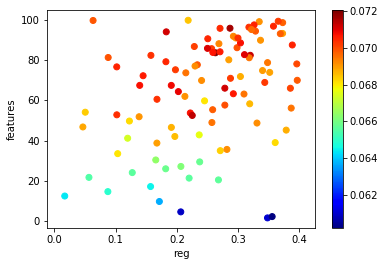

In [8]:
import matplotlib.pyplot as plt
from matplotlib import cm
colormap = cm.hot
x = metric['reg']
y = metric['features'] 
c = metric['F1']


fig = plt.figure()
img = plt.scatter(x, y, c=c, cmap=plt.jet())
plt.xlabel('reg')
plt.ylabel('features')
fig.colorbar(img)
plt.show()